<a href="https://colab.research.google.com/github/im-kozhandha/Heart_ML/blob/main/ML_PCA_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

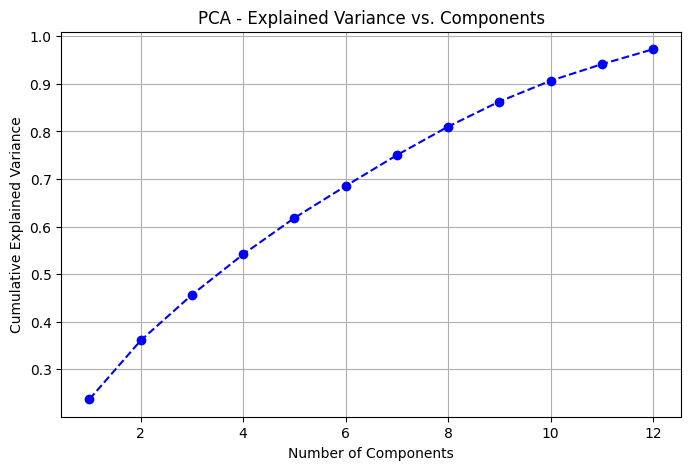

Model Accuracy after PCA: 0.5667
Number of Principal Components Used: 12


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset (replace with correct path if necessary)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=columns)

# Convert '?' to NaN and drop missing values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Convert categorical columns to numeric
df = df.astype(float)

# Define features and target
X = df.drop(columns=['target'])
y = df['target']

# Standardize features (essential before PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance vs. Components')
plt.grid()
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train Random Forest on PCA-transformed data
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

# Evaluate model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy after PCA: {accuracy:.4f}")
print(f"Number of Principal Components Used: {X_pca.shape[1]}")


Original Dimensions: 13, Reduced Dimensions: 12


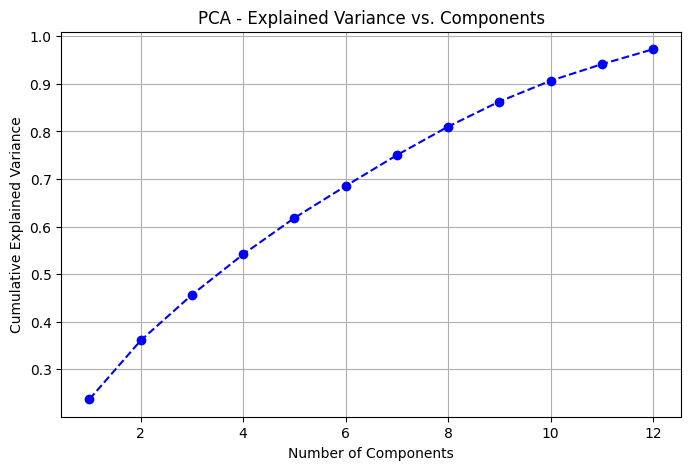


Reduced Dataset after PCA:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.130664 -1.087655  3.164263  2.293052  0.023175  0.578814  0.664854   
1  3.190926 -1.417885 -0.533715 -0.857970 -0.006289  0.745347 -0.259063   
2  3.124339  0.657008 -0.285134 -0.626641  0.152793  1.130179 -0.324995   
3 -0.484339  1.410972  0.397806  2.832741  0.721309 -0.388361 -0.522221   
4 -2.284542 -0.330033 -0.072260  1.209318  0.770835  0.625587  0.379567   

        PC8       PC9      PC10      PC11      PC12  target  
0 -0.536787 -1.495392 -0.499485  0.337585  0.479583     0.0  
1  1.069777  0.342524  1.431509 -1.145257 -0.891418     2.0  
2  0.209299  0.043205  0.462304  0.431665  0.863228     1.0  
3 -2.153525  0.760079  0.228379 -1.545065  0.342960     0.0  
4  0.014736  1.050381  0.628110  0.797211 -0.322946     0.0  


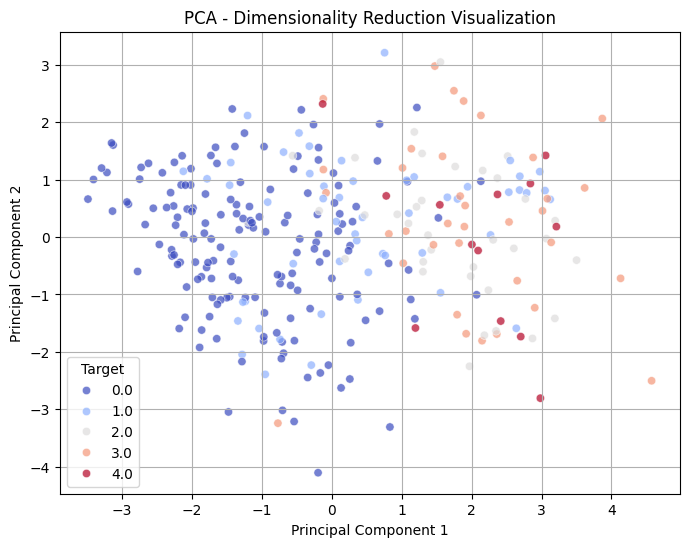

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=columns)

# Convert '?' to NaN and drop missing values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Convert categorical columns to numeric
df = df.astype(float)

# Define features and target
X = df.drop(columns=['target'])
y = df['target']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with 95% variance retention
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Show number of reduced dimensions
original_dim = X.shape[1]
reduced_dim = X_pca.shape[1]
print(f"Original Dimensions: {original_dim}, Reduced Dimensions: {reduced_dim}")

# Plot cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance vs. Components')
plt.grid()
plt.show()

# Convert PCA output to DataFrame
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca['target'] = y.values  # Add target column back

# Show the first few rows of the reduced dataset
print("\nReduced Dataset after PCA:")
print(df_pca.head())

# 2D Visualization of PCA components
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['target'], palette='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Dimensionality Reduction Visualization')
plt.legend(title="Target", loc='best')
plt.grid()
plt.show()


Original Dimensions: 13, Reduced Dimensions: 12


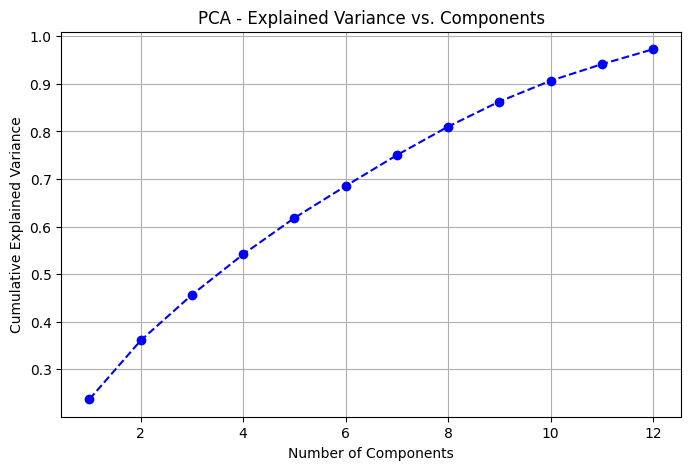


Reduced Dataset after PCA:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.130664 -1.087655  3.164263  2.293052  0.023175  0.578814  0.664854   
1  3.190926 -1.417885 -0.533715 -0.857970 -0.006289  0.745347 -0.259063   
2  3.124339  0.657008 -0.285134 -0.626641  0.152793  1.130179 -0.324995   
3 -0.484339  1.410972  0.397806  2.832741  0.721309 -0.388361 -0.522221   
4 -2.284542 -0.330033 -0.072260  1.209318  0.770835  0.625587  0.379567   

        PC8       PC9      PC10      PC11      PC12  target  
0 -0.536787 -1.495392 -0.499485  0.337585  0.479583     0.0  
1  1.069777  0.342524  1.431509 -1.145257 -0.891418     2.0  
2  0.209299  0.043205  0.462304  0.431665  0.863228     1.0  
3 -2.153525  0.760079  0.228379 -1.545065  0.342960     0.0  
4  0.014736  1.050381  0.628110  0.797211 -0.322946     0.0  


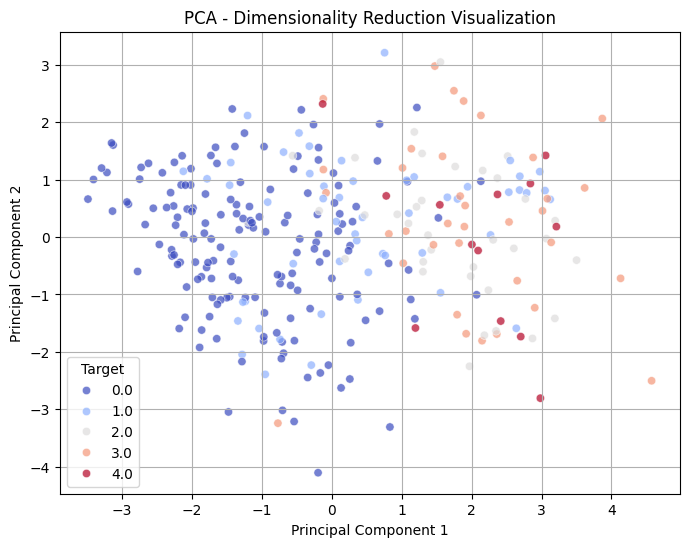

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=columns)

# Convert '?' to NaN and drop missing values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Convert categorical columns to numeric
df = df.astype(float)

# Define features and target
X = df.drop(columns=['target'])
y = df['target']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with 95% variance retention
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Show number of reduced dimensions
original_dim = X.shape[1]
reduced_dim = X_pca.shape[1]
print(f"Original Dimensions: {original_dim}, Reduced Dimensions: {reduced_dim}")

# Plot cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance vs. Components')
plt.grid()
plt.show()

# Convert PCA output to DataFrame
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca['target'] = y.values  # Add target column back

# Show the first few rows of the reduced dataset
print("\nReduced Dataset after PCA:")
print(df_pca.head())

# 2D Visualization of PCA components
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['target'], palette='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Dimensionality Reduction Visualization')
plt.legend(title="Target", loc='best')
plt.grid()
plt.show()



In [ ]:
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3.0


In [ ]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,target
0,1.130664,-1.087655,3.164263,2.293052,0.023175,0.578814,0.664854,-0.536787,-1.495392,-0.499485,0.337585,0.479583,0.0
1,3.190926,-1.417885,-0.533715,-0.857970,-0.006289,0.745347,-0.259063,1.069777,0.342524,1.431509,-1.145257,-0.891418,2.0
2,3.124339,0.657008,-0.285134,-0.626641,0.152793,1.130179,-0.324995,0.209299,0.043205,0.462304,0.431665,0.863228,1.0
3,-0.484339,1.410972,0.397806,2.832741,0.721309,-0.388361,-0.522221,-2.153525,0.760079,0.228379,-1.545065,0.342960,0.0
4,-2.284542,-0.330033,-0.072260,1.209318,0.770835,0.625587,0.379567,0.014736,1.050381,0.628110,0.797211,-0.322946,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,1.103573,0.417430,-1.501565,0.241225,-0.776197,-1.718096,0.688019,0.858376,-0.279234,-0.467305,1.264766,-0.225599,1.0
293,-0.688417,1.481431,0.719624,1.074901,-0.176818,0.008256,-1.246506,-0.855172,-2.030212,-0.138518,0.889457,-1.052006,1.0
294,2.604311,-0.197308,2.202838,-0.163669,-2.195290,-0.088366,0.172261,-1.042334,0.868708,-0.748217,-0.639948,0.765277,2.0
295,1.886791,2.371910,-0.033654,-0.076793,-1.512049,-0.136307,0.394050,1.294393,0.301879,0.160633,0.502944,-0.026415,3.0


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df_pca.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'target'],
      dtype='object')

7 march


Top Features After PCA:
     Feature  Importance
11        ca    3.134848
4       chol    3.096653
8      exang    3.041119
2         cp    2.979770
3   trestbps    2.970421
0        age    2.849877


<ipython-input-1-6659cdf8f287>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='coolwarm')


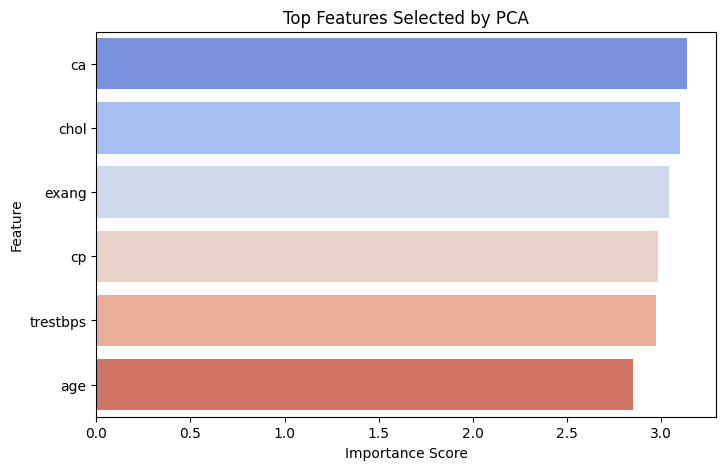

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=columns)

# Convert '?' to NaN and drop missing values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Convert categorical columns to numeric
df = df.astype(float)

# Define features and target
X = df.drop(columns=['target'])
y = df['target']

# Standardize features (PCA requires scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Get feature importance by examining PCA component loadings
loadings = pca.components_.T  # Transpose to get features' contribution to each PC
feature_importance = np.abs(loadings).sum(axis=1)  # Sum of absolute contributions across PCs
important_features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort by importance and select top features
important_features = important_features.sort_values(by='Importance', ascending=False)
top_features = important_features.head(6)  # Choose top 6 features based on importance

# Print important features
print("Top Features After PCA:")
print(top_features)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='coolwarm')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top Features Selected by PCA")
plt.show()


In [ ]:
# Get important features
loadings = pca.components_.T
feature_importance = np.abs(loadings).sum(axis=1)
important_features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
selected_features = important_features.sort_values(by='Importance', ascending=False).head(6)['Feature'].values
# Create reduced dataset
df_reduced = df[selected_features].copy()
df_reduced['target'] = y

# Print datasets
print("\n => Original Dataset (First 5 Rows):")
print(df.head())

print("\n => Reduced Dataset After PCA (First 5 Rows):")
print(df_reduced.head())


 => Original Dataset (First 5 Rows):
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0     0.0  
1    2.0  3.0   3.0     2.0  
2    2.0  2.0   7.0     1.0  
3    3.0  0.0   3.0     0.0  
4    1.0  0.0   3.0     0.0  

 => Reduced Dataset After PCA (First 5 Rows):
    ca   chol  exang   cp  trestbps   age  target
0  0.0  233.0    0.0  1.0     145.0  63.0     0.0
1  3.0  286.0    1.0  4.0     160.0  67.0     2.0
2  2.0  229.0    1.0  4.0     120.0  67.0     1.0
3  0.0  250.0    0.0  3.0     130.0  37.0     0.0
4  0.0  204.0    0.0  

In [ ]:
from google.colab import files
df.to_csv("original_heart_disease.csv", index=False)
files.download("original_heart_disease.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save Reduced Dataset
df_reduced.to_csv("reduced_heart_disease.csv", index=False)
files.download("reduced_heart_disease.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.shape

(297, 14)

In [ ]:
df_reduced.shape

(297, 7)

for all 4 datasets

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#from google.colab import files # This import is likely unnecessary outside of Google Colab

# URLs for all datasets
datasets = {
    "cleveland": "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
    "hungary": "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data",
    "switzerland": "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data",
    "va": "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data",
}

# Column names (same for all)
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Load and combine all datasets
df_list = []
for name, url in datasets.items():
    df_temp = pd.read_csv(url, names=columns)
    df_temp['source'] = name  # Add dataset name as a new column
    df_list.append(df_temp)

df = pd.concat(df_list, ignore_index=True)

# Convert '?' to NaN and drop missing values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Convert only numerical columns to float
# Exclude 'source' column, as it contains strings
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].astype(float)

# ... (rest of your code remains the same)

# Save and download original combined dataset
df.to_csv("combined_heart_disease.csv", index=False)
files.download("combined_heart_disease.csv")

# Define features and target
X = df.drop(columns=['target', 'source'])
y = df['target']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Get important features
loadings = pca.components_.T
feature_importance = np.abs(loadings).sum(axis=1)
important_features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
selected_features = important_features.sort_values(by='Importance', ascending=False).head(6)['Feature'].values

# Create reduced dataset
df_reduced = df[selected_features].copy()
df_reduced['target'] = y

# Save and download reduced dataset
df_reduced.to_csv("reduced_combined_heart_disease.csv", index=False)
files.download("reduced_combined_heart_disease.csv")

# Print dataset shapes
print("🔹 Shape of Combined Original Dataset:", df.shape)
print("🔹 Shape of Reduced Dataset After PCA:", df_reduced.shape)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

🔹 Shape of Combined Original Dataset: (299, 15)
🔹 Shape of Reduced Dataset After PCA: (299, 7)
